In [3]:
%matplotlib inline

# Rayleigh quotient

+ $M$: Hermitian matrix 
+ $x$: nonzero vector 

+ __Rayleigh quotient__: $R(M,x)={x^{*}Mx \over x^{*}x}$

If $x$ is an eigenvector of $A$ then $R(M,x)$ is its eigenvalue.
Otherwise, $R(M,x)$ is the closest scalar to an eigenvalue (in least squares): 

__Exercise 1__:

Which is the value $\alpha$ that minimizes $||Ax - \alpha x||_2^2$?

__hint__: Compute the derivative of $||Ax - \alpha x||_2^2$ w.r.t. $\alpha$

__Exercise 2__:
    
+ Set numpy's random generator to 0 (use the `np.random.seed` function)
+ Generate $A$, a $2 \times 2$ random matrix (use `np.random.randn`)
+ Compute $M = A^* A$. Is this matrix Hermitian?
+ Compute its eigenvalues and eigenvectors (use `np.linalg.eig`)
+ Choose one of the eigenvectors and compute its Rayleigh quotient
+ Write a function that compute the Rayleigh quotient of a vector, w.r.t. a matrix, both sent as parameters
+ Generate 1000 random vectors $\sim \mathcal{N}(\mu = 0,\sigma = 10)$
+ For each vector compute its Rayleigh quotient
+ Plot the histogram of the resulting Rayleigh quotients (use `matplotlib.pyplot.hist`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
def rayleigh_quotient(x,A):
    return(x.T.dot(A).dot(x)/x.T.dot(x))

In [3]:
A = np.random.randn(2,2)
A = A.T.dot(A)

In [4]:
l,X = np.linalg.eig(A)

In [5]:
print(A.dot(X))
print(X.dot(np.eye(2)*l))

[[-1.29020049 -4.82739792]
 [ 1.06629199 -5.84109345]]
[[-1.29020049 -4.82739792]
 [ 1.06629199 -5.84109345]]


In [7]:
rayleigh_quotient(X[:,1],A)

7.577739988681693

In [9]:
eigs = []
for i in range(1000):
    random_vectors = np.random.randn(2)*10
    eigs.append(rayleigh_quotient(random_vectors,A))

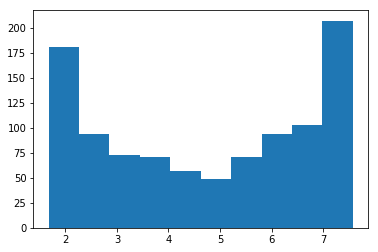

In [10]:
_= plt.hist(eigs,bins=10)

In [11]:
n = 4
A = np.random.randn(n,n)
A = A.T.dot(A)
l,X = np.linalg.eig(A)

In [12]:
l

array([1.52776302e+01, 4.02664493e+00, 1.22315756e-03, 2.38407897e-01])

In [13]:
X

array([[ 0.81171995, -0.32852188, -0.38049182, -0.29733832],
       [-0.22739047, -0.52398333, -0.52545801,  0.63057825],
       [ 0.52307017,  0.43870594,  0.18461059,  0.70700327],
       [-0.12570561,  0.65196008, -0.73826742, -0.11877444]])

In [18]:
eigs = []
for i in range(100000):
    random_vectors = np.random.uniform(-1,1,n)
    eigs.append(rayleigh_quotient(random_vectors,A))

In [19]:
min(eigs),max(eigs)

(0.005040824213282836, 15.260591948758542)

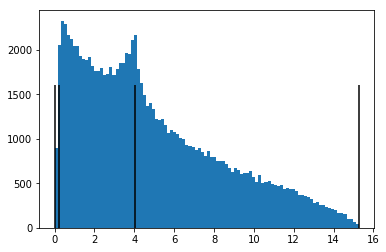

In [20]:
_=plt.hist(eigs,bins=100)
for ll in l:
    plt.vlines(x=ll,ymax=1600,ymin=0)

# Power iteration
A well known method to compute eigenvalues is the power iteration method (also known as the Von Mises iteration).

This method takes $A$ a diagonalizable matrix as an input, and it outputs its greatest eigenvalue $\lambda$ (in absolute value), and its corresponding eigenvector $v$ (i.e., $Av=\lambda v$).

__Power iteration__($A$):
+ __initialization__: create $b$ a random vector s.t. $||b||_2 = 1$ 
+ __Repeat__:
    + $w \leftarrow Ab$
    + $b \leftarrow w/||w||$
    + $\lambda = b^T A b$
    
This method does not converge if:
+ The initial vector $b$ is orthogonal with the eigenvector of $\lambda$
+ The eigenvalue is not unique

__Exercise 3__ How does this method work?
+ Write $b^{(k)}$ ($b$ at iteration $k$) as a function of $b^{(0)}$ ($b$ at iteration 0) and $A$
+ Let us assume that the initial vector is s.t.:
$b^{0}=c_{1}v_{1}+c_{2}v_{2}+\cdots +c_{m}v_{m}$, with $v_i$ the $i$-th eigenvector.
+ Decompose $A^k b^{(0)}$ according to the previous equation.
+ Factorize by $\lambda_1$, i.e., the largest eigenvalue.
+ When $k$ is large to which value does the previous expression converge?

__Exercise 4__ 
+ Write the Power iteration method
+ In order to analyze the algorithm compute:
    + The eigenvalues and eigenvectors using `np.linalg.eig`
    + Compute the difference between the two largest eigenvalues
    + At each iteration compute the difference between the largest eigenvalues output by `np.linalg.eig`, and the current value estimated by the power iteration method.
+ For different random matrices $M$ generated as in the previous exercise:
    + Run 10 iterations of the power iteration method
    + Record and plot the evolution of the error
 

In [18]:
def power_iteration(A, num_simulations):
    # choose a random vector
    b_k = np.random.rand(A.shape[1])
    b_k = b_k/np.linalg.norm(b_k)
    # Compute the eigenvalues
    l,X = np.linalg.eig(A)
    diff_l1_l2 = np.abs(l[0] - l[1])
    error = []
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)
        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)
        # re normalize the vector
        b_k = b_k1 / b_k1_norm
        lambda_ = b_k.T.dot(A).dot(b_k)
        error.append(np.abs(lambda_ - l[0]))
    return b_k,lambda_,error, diff_l1_l2

In [19]:
diff = []
err = []
A = np.random.randn(10,10)
A = A.T.dot(A)
b_k,lambda_,error, diff_l1_l2 = power_iteration(A,30)

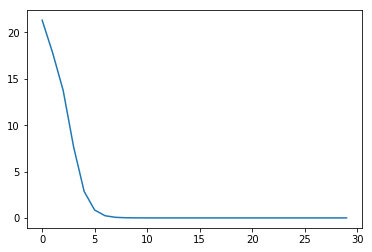

In [20]:
plt.plot(error)

# Inverse iteration method
+ $A$: square matrix, $\forall i, \;\lambda_i$ are eigenvalues of $A$
+ Let $\mu \in \mathbb{R}$ s.t. $\mu \neq \lambda_i$

Matrix $(A − \mu I)^{−1}$ and $A$ have the same eigenvectors, 
and the eigenvalues of $(A − \mu I)^{−1}$ are $(\lambda - \mu)^{-1}$

__Exercise 5__: Prove the previous statement.

$AX = X \Lambda$

$A = X \Lambda X^{-1}$

$A-\mu \mathbf{I} = X \Lambda X^{-1} - \mu \mathbf{I}$

$A-\mu \mathbf{I} = X \Lambda X^{-1} - \mu X X^{-1}$

$A-\mu \mathbf{I} = X \Lambda X^{-1} - \mu X \mathbf{I} X^{-1}$

$A-\mu \mathbf{I} = X \Lambda X^{-1} -  X (\mu \mathbf{I}) X^{-1}$

$A-\mu \mathbf{I} = X (\Lambda - \mu \mathbf{I}) X^{-1}$

$(A-\mu \mathbf{I})^{-1} = (X (\Lambda - \mu \mathbf{I}) X^{-1})^{-1}$

$(A-\mu \mathbf{I})^{-1} = X (\Lambda - \mu \mathbf{I})^{-1} X^{-1}$


If $\mu$ is close to the eigenvalue $\lambda_j$ then $(\lambda_j - \mu \mathbf{I})^{-1}$ is a larger eigenvalue than $(\lambda_i - \mu \mathbf{I})^{-1}, \; \forall j \neq i$. 

The power iteration method applied to $(\lambda_i - \mu \mathbf{I})^{-1}$ converges quickly.

__Inverse Iteration Algorithm__ ($A$, $\mu$):
+ __Initialization__: Generate $v$ a random vector with norm 1
+ __Repeat__:
    + $w \leftarrow (A-\mu I)^{-1}v$
    + $v \leftarrow w/||w||$
    + $\lambda \leftarrow v^TAv$ 
    
__Exercise 6__: 
+ Program the inverse iteration algorithm
+ Generate a random matrix $M$ like in the previous exercises
+ Test the algorithm setting $\mu = 10$ and iterating for 100 steps, and compare to the output of the `np.linalg.eig` function.
+ For 100 random values of $\mu ~\mathcal{N}(0,\sigma=10)$, compute an eigenvalue with the inverse iteration algorithm.
+ Print the eigenvalues found with 2 decimals precision (use the `np.round` function)


In [71]:
def inverse_iteration(A,mu,nb_iterations):
    n = A.shape[0]
    v = np.random.randn(n)
    v = v/np.linalg.norm(v)
    for i in range(nb_iterations):
        w = np.linalg.inv(A-mu*np.eye(n)).dot(v)
        v  = w / np.linalg.norm(w)
        l = v.T.dot(A).dot(v)
    return(v,l)

In [78]:
A = np.random.randn(10,10)
A = A.T.dot(A)
inverse_iteration(A,10,100)

(array([-0.36527646,  0.12533622, -0.02266217, -0.3116428 ,  0.08346497,
        -0.37139218, -0.06325856,  0.67819925,  0.24750015, -0.28830261]),
 7.944303840320273)

In [79]:
lambdas,V = np.linalg.eig(A)

In [80]:
ls = []
for i in range(100):
    v,l = inverse_iteration(A,np.random.randn(1)[0]*10,500)
    ls.append(np.round(l,decimals=2))

In [81]:
np.unique(ls)

array([1.000e-02, 5.900e-01, 2.430e+00, 3.790e+00, 5.500e+00, 5.570e+00,
       7.940e+00, 1.373e+01, 1.565e+01, 1.757e+01, 4.312e+01])

In [82]:
lambdas

array([4.31203451e+01, 1.75654706e+01, 1.56481394e+01, 1.37257454e+01,
       7.94430384e+00, 8.09727741e-03, 5.94688059e-01, 5.49781003e+00,
       2.43104897e+00, 3.79461178e+00])

# Iteration of Rayleigh quotient
Instead of using a random value $\mu$ as initial guess, we can use the Rayleigh quotient instead.

Moreover updating $\mu$ at each iteration allows a faster convergence.

These ideas give birth to the Rayleigh quotient iteration method

__Rayleigh quotient iteration__($A$):

+ __Initialization__: Generate $v$ a random vector with norm 1
+ $\lambda \leftarrow v^T A v$ (Rayleigh quotient)
+ __Repeat__:
    + $w = (A-\lambda)^{-1}v$
    + $v = w/||w||$
    + $\lambda = v^T A v$
    
__Exercise 7__: 
+ Program the Rayleigh quotient iteration algorithm
+ Generate a random matrix $M$ like in the previous exercises
+ Test the algorithm, and compare to the output of the `np.linalg.eig` function.
+ Compute 100 eigenvalues with the inverse iteration algorithm.
+ Print the eigenvalues found with 2 decimals precision (use the `np.round` function)

In [113]:
def rayleigh_quotient_iteration(A,nb_iterations):
    n = A.shape[0]
    v = np.random.randn(n)
    v = v/np.linalg.norm(v)
    l = v.T.dot(A.dot(v))
    for i in range(nb_iterations):
        w = np.linalg.inv(A-l*np.eye(n)).dot(v)
        v  = w / np.linalg.norm(w)
        l = v.T.dot(A).dot(v)
    return(v,l)

In [114]:
A = np.random.randn(10,10)
A = A.T.dot(A)
rayleigh_quotient_iteration(A,100)

(array([-0.35912701, -0.16723015, -0.36407796,  0.16235815, -0.15638406,
        -0.67775991,  0.04843764,  0.42576309, -0.0641809 , -0.11222683]),
 12.586669819092068)

In [115]:
lambdas,V = np.linalg.eig(A)

In [116]:
lambdas

array([3.09915542e+01, 2.54393582e+01, 1.90032924e+01, 1.25866698e+01,
       8.39664278e+00, 4.93746942e+00, 2.78809334e+00, 1.66122112e+00,
       2.86074927e-01, 9.09068012e-03])

In [123]:
ls = []
for i in range(100):
    v,l = rayleigh_quotient_iteration(A,100)
    ls.append(np.round(l,decimals=2))

In [124]:
np.unique(ls)

array([ 2.79,  4.94,  8.4 , 12.59, 19.  , 25.44])

# Schur factorization
__Goal__: Factorize $A$ in order to reveal the eigenvalues.

$$A = Q T Q^*$$

+ $Q$: unitary matrix
+ $T$: Upper triangular matrix
+ $T$ and $A$ are similar matrices, so they have the same eigenvalues

__Theorem__: Every square matrix has a Schur decomposition

__Method__: This factorization is computed iteratively using the $QR$ factorization

__Schur factorization__(A):
+ Let $A_0 = A$
+ __Repeat__ for k=0 to $NbIterations$:
    + Compute the factorization $A_k = Q_k R_k$
    + Define $A_{k+1} \leftarrow R_k Q_k = Q_k^* A_k Q_k$
    
    
__Exercise 8__:
+ Program the Schur factorization algorithm 
+ Generate a matrix $M$ like in the previous exercises/.
+ Compute the matrix $T$ and compare the diagonal of $T$ with the eigenvalues computed with the `np.linalg.eig` function

In [166]:
def schur_factorization(A,nb_iterations):
    for i in range(nb_iterations):
        Q,R = np.linalg.qr(A)
        A = R.dot(Q)
    return Q.T,A,Q

In [167]:
A = np.random.randn(10,10)
A = A.T.dot(A)
Q,T,Q_t = schur_factorization(A,1000)

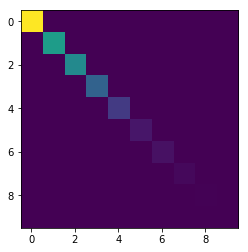

In [168]:
plt.imshow(T)

In [169]:
np.diag(T)

array([4.19897624e+01, 2.31319269e+01, 1.97425552e+01, 1.31557566e+01,
       7.18370535e+00, 2.52868909e+00, 1.83486023e+00, 8.55768459e-01,
       2.52216803e-01, 2.11416479e-03])

In [178]:
l,V = np.linalg.eig(A)
l

array([4.19897624e+01, 2.31319269e+01, 1.97425552e+01, 1.31557566e+01,
       7.18370535e+00, 2.52868909e+00, 1.83486023e+00, 8.55768459e-01,
       2.52216803e-01, 2.11416479e-03])